In [1]:
# binomial logistic regression model


In [1]:
# 5.5.2 Data exercise
import pandas as pd
from IPython.display import display
import statsmodels.api as sm

In [2]:
# 5.5.2 Data exercise

# Load the dataset
df_charity = pd.read_csv("charity_donation.csv")

# Preview structure
print(df_charity.shape)
print(df_charity.dtypes)
display(df_charity.head(10))  

(354, 8)
n_donations         int64
total_donations     int64
time_donating       int64
recent_donation     int64
last_donation       int64
gender             object
reside             object
age                 int64
dtype: object


,n_donations,total_donations,time_donating,recent_donation,last_donation,gender,reside,age
0,2,310,27,0,4,M,Urban Domestic,29
1,3,1200,22,0,6,M,Rural Domestic,41
2,3,1200,37,1,11,M,Urban Domestic,77
3,2,760,19,1,1,F,Overseas,66
4,6,2540,37,0,11,M,Urban Domestic,26
5,8,3440,35,1,1,M,Rural Domestic,65
6,3,1200,36,0,4,F,Overseas,60
7,10,4330,42,0,1,F,Urban Domestic,50
8,5,2100,27,1,6,F,Rural Domestic,82
9,3,1200,34,0,4,M,Rural Domestic,41


In [3]:
# 5.5.2 Data exercise
# check for missing values
print(df_charity.isnull().sum())

# show summary statistics (will include all numeric columns by default)
print(df_charity.describe(include='all'))



n_donations        0
total_donations    0
time_donating      0
recent_donation    0
last_donation      0
gender             0
reside             0
age                0
dtype: int64
        n_donations  total_donations  time_donating  recent_donation  \
count    354.000000       354.000000     354.000000       354.000000   
unique          NaN              NaN            NaN              NaN   
top             NaN              NaN            NaN              NaN   
freq            NaN              NaN            NaN              NaN   
mean       5.751412      2350.141243      33.923729         0.234463   
std        5.445097      2496.578561      13.600006         0.424263   
min        2.000000       310.000000      15.000000         0.000000   
25%        2.000000       760.000000      23.000000         0.000000   
50%        4.000000      1650.000000      30.000000         0.000000   
75%        7.000000      2990.000000      43.000000         0.000000   
max       44.000000     195

In [4]:
# 5.5.2 Data exercise

# Step 1: Create encoded copy
df_encoded = pd.get_dummies(df_charity, columns=['gender', 'reside'], drop_first=True)

# Step 2: Convert boolean columns to integers
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)

# Step 3: Define predictors (X) and target (y)
X = df_encoded[['age', 'last_donation', 'gender_M', 'reside_Rural Domestic', 'reside_Urban Domestic']]
X = sm.add_constant(X)

y = df_encoded['recent_donation']  # Confirm this is 0/1

# Step 4: Fit the model
logit_model = sm.Logit(y, X).fit()

# Step 5: Display summary
print(logit_model.summary())




Optimization terminated successfully.
         Current function value: 0.326791
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        recent_donation   No. Observations:                  354
Model:                          Logit   Df Residuals:                      348
Method:                           MLE   Df Model:                            5
Date:                Thu, 18 Sep 2025   Pseudo R-squ.:                  0.4000
Time:                        18:39:35   Log-Likelihood:                -115.68
converged:                       True   LL-Null:                       -192.79
Covariance Type:            nonrobust   LLR p-value:                 1.688e-31
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -6.4420      0.845     -7.627      0.000      -8.097      -4.

In [9]:
# 5.5.2 Data exercise
# Collinearity & Multicollinearity

# numeric-only correlation matrix
corr_matrix = df_encoded[['age','last_donation', 'n_donations', 'total_donations','time_donating']].corr()
print(corr_matrix)


                      age  last_donation  n_donations  total_donations  \
age              1.000000      -0.043915     0.050570         0.051601   
last_donation   -0.043915       1.000000    -0.131847        -0.132986   
n_donations      0.050570      -0.131847     1.000000         0.997827   
total_donations  0.051601      -0.132986     0.997827         1.000000   
time_donating   -0.091300       0.065630     0.600566         0.616484   

                 time_donating  
age                  -0.091300  
last_donation         0.065630  
n_donations           0.600566  
total_donations       0.616484  
time_donating         1.000000  


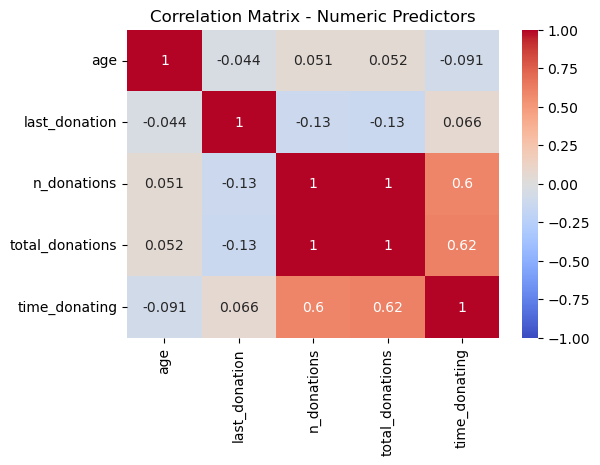

In [14]:
# 5.5.2 Data exercise
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric predictors
numeric_vars = ['age','last_donation', 'n_donations', 'total_donations','time_donating']

# Compute correlation matrix
corr = df_encoded[numeric_vars].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Correlation Matrix - Numeric Predictors")
plt.show()



In [10]:
# 5.5.2 Data exercise
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)


                 feature        VIF
0                  const  15.866021
1                    age   1.009072
2          last_donation   1.008696
3               gender_M   1.001728
4  reside_Rural Domestic   1.362658
5  reside_Urban Domestic   1.348043


In [15]:
# 5.5.2 Data exercise
# fit the model with new predictors that are highly correlated
X_test = df_charity[['age', 'last_donation', 'n_donations', 'total_donations']]
y_test = df_charity['recent_donation']

# add constant
X_test = sm.add_constant(X_test)

logit_model_test = sm.Logit(y_test, X_test).fit()
print(logit_model_test.summary())


Optimization terminated successfully.
         Current function value: 0.343831
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        recent_donation   No. Observations:                  354
Model:                          Logit   Df Residuals:                      349
Method:                           MLE   Df Model:                            4
Date:                Thu, 18 Sep 2025   Pseudo R-squ.:                  0.3687
Time:                        20:04:42   Log-Likelihood:                -121.72
converged:                       True   LL-Null:                       -192.79
Covariance Type:            nonrobust   LLR p-value:                 9.759e-30
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.9308      0.850     -6.976      0.000      -7.597      -4.264
age           

In [16]:
# 5.5.2 Data exercise
# highly corrleated predictors
vif_data = pd.DataFrame()
vif_data['feature'] = X_test.columns
vif_data['VIF'] = [variance_inflation_factor(X_test.values, i)
                   for i in range(X_test.shape[1])]
print(vif_data)


           feature         VIF
0            const   17.375141
1              age    1.004260
2    last_donation    1.019592
3      n_donations  230.398957
4  total_donations  230.490826


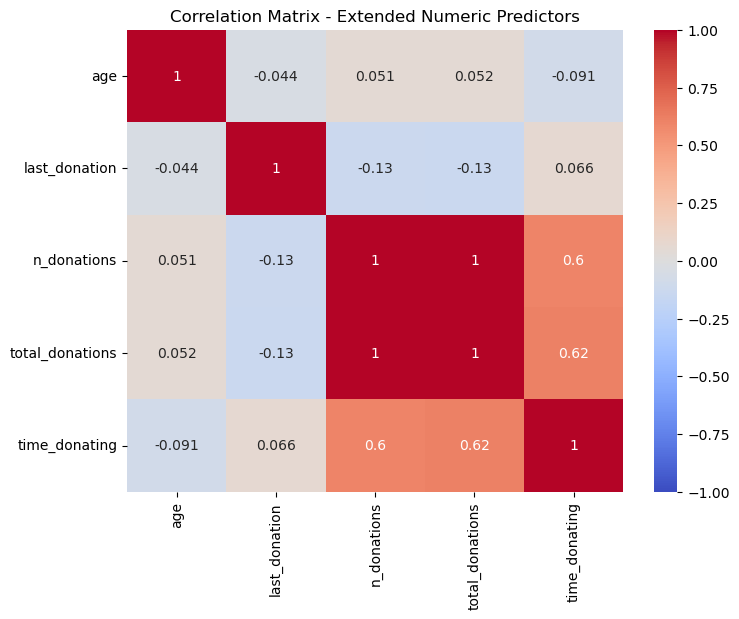

In [17]:
# 5.5.2 Data exercise
# Select a wider set of numeric predictors
numeric_vars = ['age', 'last_donation', 'n_donations', 'total_donations', 'time_donating']

# Compute correlation matrix
corr = df_charity[numeric_vars].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Correlation Matrix - Extended Numeric Predictors")
plt.show()


In [18]:
# 5.5.2 Data exercise
# Select numeric predictors
numeric_vars = ['age', 'last_donation', 'n_donations', 'total_donations', 'time_donating']

# Compute correlation matrix
corr_matrix = df_charity[numeric_vars].corr()

# Convert to a long-form table and remove self-correlations
corr_pairs = (
    corr_matrix.unstack()
    .reset_index()
    .rename(columns={'level_0': 'var1', 'level_1': 'var2', 0: 'correlation'})
)

# Keep only one triangle of the matrix (var1 < var2 to avoid duplicates)
corr_pairs = corr_pairs[corr_pairs['var1'] < corr_pairs['var2']]

# Sort by absolute correlation strength
corr_pairs = corr_pairs.reindex(corr_pairs.correlation.abs().sort_values(ascending=False).index)

print(corr_pairs)


             var1             var2  correlation
13    n_donations  total_donations     0.997827
23  time_donating  total_donations     0.616484
14    n_donations    time_donating     0.600566
8   last_donation  total_donations    -0.132986
7   last_donation      n_donations    -0.131847
4             age    time_donating    -0.091300
9   last_donation    time_donating     0.065630
3             age  total_donations     0.051601
2             age      n_donations     0.050570
1             age    last_donation    -0.043915


In [22]:
# 5.5.2 Data exercise
# model parsimony and AIC score
import statsmodels.formula.api as smf
import numpy as np

# --- Helper: fit a logistic model given a formula ---
def fit_logit(formula, data, label="Model"):
    model = smf.logit(formula=formula, data=data).fit(disp=0)  # disp=0 suppresses long output
    print(f"\n=== {label} ===")
    print(model.summary())
    return model

# --- Helper: compute pseudo-R²s ---
def pseudo_r2(model, data, target):
    ll_null = smf.logit(f"{target} ~ 1", data=data).fit(disp=0).llf
    ll_model = model.llf
    n = data.shape[0]

    # McFadden
    r2_mcfadden = 1 - (ll_model / ll_null)

    # Tjur
    preds = model.predict(data)
    r2_tjur = preds[data[target]==1].mean() - preds[data[target]==0].mean()

    return {"McFadden": r2_mcfadden, "Tjur": r2_tjur, "AIC": model.aic}

In [23]:
# --- Run models ---
full_model = fit_logit("recent_donation ~ age + last_donation + n_donations + total_donations + gender + reside",
                       df_charity, label="Full Model")

no_n_model = fit_logit("recent_donation ~ age + last_donation + total_donations + gender + reside",
                       df_charity, label="No n_donations")

no_total_model = fit_logit("recent_donation ~ age + last_donation + n_donations + gender + reside",
                           df_charity, label="No total_donations")

# --- Compare metrics ---
print("\n=== Model Comparison ===")
for name, model in [("Full", full_model), ("No n_donations", no_n_model), ("No total_donations", no_total_model)]:
    metrics = pseudo_r2(model, df_charity, "recent_donation")
    print(f"{name}: {metrics}")


=== Full Model ===
                           Logit Regression Results                           
Dep. Variable:        recent_donation   No. Observations:                  354
Model:                          Logit   Df Residuals:                      346
Method:                           MLE   Df Model:                            7
Date:                Thu, 18 Sep 2025   Pseudo R-squ.:                  0.4081
Time:                        20:28:31   Log-Likelihood:                -114.11
converged:                       True   LL-Null:                       -192.79
Covariance Type:            nonrobust   LLR p-value:                 1.153e-30
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -6.2552      0.908     -6.891      0.000      -8.034      -4.476
gender[T.M]                 -0.8688      0.360     -2.413      0.016 

AUC: 0.8788


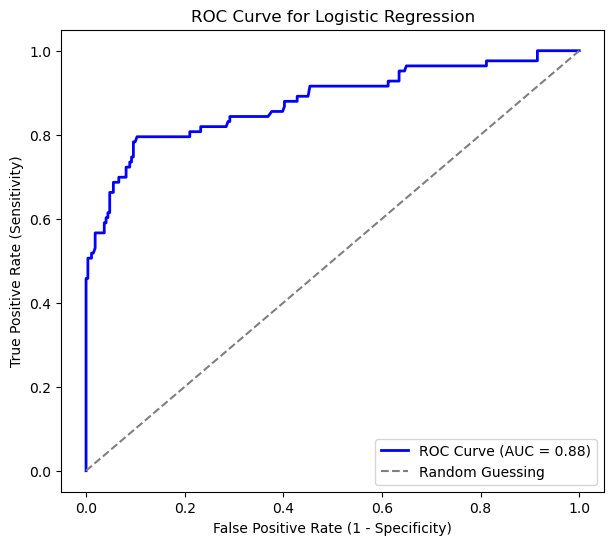

In [25]:
# 5.5.2 Data exercise
# ROC Curve
# === ROC Curve and AUC for Logistic Regression ===
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities directly from the fitted model
y_pred_prob = logit_model.predict()

# True labels
y_true = df_charity['recent_donation']

# ROC Curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
auc = roc_auc_score(y_true, y_pred_prob)
print(f"AUC: {auc:.4f}")

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()



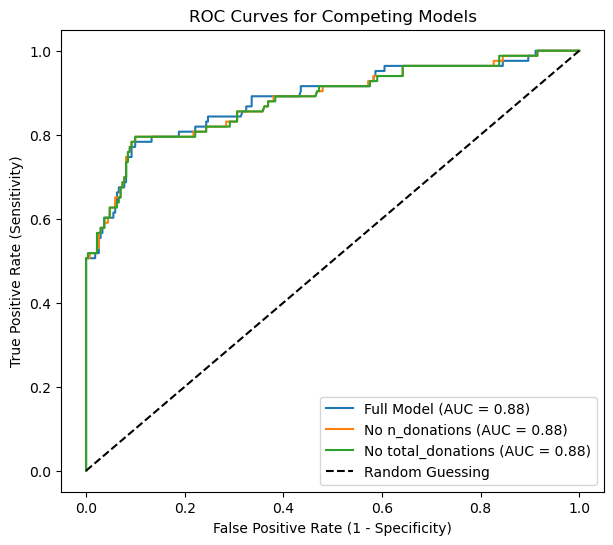

In [28]:
# 5.5.2 Data exercise
# compare ROC curves

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Dictionary with correct model names
models = {
    "Full Model": full_model,
    "No n_donations": no_n_model,
    "No total_donations": no_total_model
}

plt.figure(figsize=(7,6))

# Loop through models and plot ROC curves
for name, model in models.items():
    y_pred_prob = model.predict()  # predict probabilities
    y_true = df_charity['recent_donation']
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Plot random guessing line
plt.plot([0,1], [0,1], 'k--', label="Random Guessing")

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curves for Competing Models")
plt.legend()
plt.show()




In [29]:
# 5.5.2 Data exercise
# --- Final Comparison Table with AUC, AIC, R²s ---

comparison = []

for name, model in [
    ("Full Model", full_model),
    ("No n_donations", no_n_model),
    ("No total_donations", no_total_model)
]:
    # Predicted probabilities
    y_pred_prob = model.predict(df_charity)
    auc = roc_auc_score(df_charity["recent_donation"], y_pred_prob)

    # AIC
    aic = model.aic

    # McFadden and Tjur R²
    r2s = pseudo_r2(model, df_charity, "recent_donation")

    # Collect results
    comparison.append({
        "Model": name,
        "AUC": round(auc, 3),
        "AIC": round(aic, 2),
        "McFadden R²": round(r2s["McFadden"], 3),
        "Tjur R²": round(r2s["Tjur"], 3)
    })

# Convert to DataFrame
results_table = pd.DataFrame(comparison)
display(results_table)


,Model,AUC,AIC,McFadden R²,Tjur R²
0,Full Model,0.885,244.23,0.408,0.465
1,No n_donations,0.881,243.82,0.404,0.462
2,No total_donations,0.881,244.00,0.404,0.462


In [43]:
# 5.5.2 Data exercise
# build a function to apply the fitted model to make predictions

# Generate probabilities and classifications for new data
# Ensures categorical variables match training categories.



In [42]:
# 5.5.2 Data exercise
# apply the model to new data to make predictions

# suppose logit_model is already fitted
# Example new donors


